**Importing necessary packages**

In [1]:
import os # enable interaction with the operating system
import pandas as pd # python's data handling package
import numpy as np # python's scientific computing package
import matplotlib.pyplot as plt # python's plotting package
from sklearn.tree import DecisionTreeRegressor # Decision tree model

**Read data from Excel**

In [2]:
data = pd.read_excel('Data_DecisionTree.xlsx') 
print(data.head())

   Qual  Area   Price
0     7  1710  0.2085
1     6  1262  0.1815
2     7  1786  0.2235
3     7  1717  0.1400
4     8  2198  0.2500


**First 1800 data items are training set; the next 600 are the validation set**

In [3]:
train = data.iloc[:1800]
val = data.iloc[1801:2400]
test = data.iloc[2401:]
print(train.shape,val.shape,test.shape)

(1800, 3) (599, 3) (507, 3)


**Seperating the features and labels of train, test and validation data**

In [4]:
y_train = train['Price'].values
X_train = train.iloc[:, :-1].values
y_test = test['Price'].values
X_test = test.iloc[:,:-1].values
y_val = val['Price'].values
X_val = val.iloc[:,:-1].values

**Applying the Model over the train data and evluating over the test data**

In [5]:
# Decision tree Regressoe implementation

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

# Getting the test data prediction
y_pred = dtr.predict(X_test)

# Evaluating the model prediction
print(f'Model Accuracy: {dtr.score(X_val, y_val)}')

# Evaluating the Mean Squrred Error of the model prediction
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)
print("Mean Squarred Error:", MSE)

Model Accuracy: 0.6793494284169873
Mean Squarred Error: 0.002140349277123814


In [6]:
# Getting the features importance 
dtr.feature_importances_
dtr_df = pd.DataFrame({'feature': list(train.iloc[:, :-1].columns), 'importance': dtr.feature_importances_}).sort_values('importance', ascending = False)
print(dtr_df)

  feature  importance
0    Qual    0.693141
1    Area    0.306859


**MSE Estimation for the Quality attribute**

In [7]:
MSE = []
for Z in [3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10]:
    # Extracting the Quality data according to the threshold value
    X = train[train['Qual'] < Z]['Qual'].values
    y = train[train['Qual'] < Z]['Price']
    
    # Model Initializing
    dtr = DecisionTreeRegressor()
    dtr.fit(X.reshape((-1,1)), y)

    # Predict over the test dataset
    pred = dtr.predict(train['Qual'].values.reshape((-1,1)))
    print("----------------------------------------------------")
    print("Z", Z)
    print("No of obs < Z:", X.shape[0])
    print("mse of < Z:", mean_squared_error(pred, train['Price'].values))
    MSE.append(mean_squared_error(pred, train['Price'].values))

----------------------------------------------------
Z 3.5
No of obs < Z: 32
mse of < Z: 0.014377971325402472
----------------------------------------------------
Z 4.5
No of obs < Z: 173
mse of < Z: 0.011157774143641292
----------------------------------------------------
Z 5.5
No of obs < Z: 661
mse of < Z: 0.008015727707185054
----------------------------------------------------
Z 6.5
No of obs < Z: 1122
mse of < Z: 0.005747297142388213
----------------------------------------------------
Z 7.5
No of obs < Z: 1512
mse of < Z: 0.0036719466408583613
----------------------------------------------------
Z 8.5
No of obs < Z: 1726
mse of < Z: 0.002333925540583919
----------------------------------------------------
Z 9.5
No of obs < Z: 1784
mse of < Z: 0.0018351864824334887
----------------------------------------------------
Z 10
No of obs < Z: 1784
mse of < Z: 0.0018351864824334887


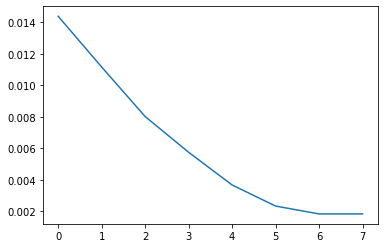

In [8]:

plt.plot(range(8), MSE)

**MSE Estimation for the Area attribute**

In [9]:
MSE = []
for Z in [600, 900, 1500, 1800, 2100, 2400, 2700, 3000, 3500, 3700]:
    # Extracting the Quality data according to the threshold value
    X = train[train['Area'] < Z]['Area'].values
    y = train[train['Area'] < Z]['Price']
    
    # Model Initializing
    dtr = DecisionTreeRegressor()
    dtr.fit(X.reshape((-1,1)), y)

    # Predict over the test dataset
    pred = dtr.predict(train['Area'].values.reshape((-1,1)))
    print("----------------------------------------------------")
    print("Z", Z)
    print("No of obs < Z:", X.shape[0])
    print("mse of < Z:", mean_squared_error(pred, train['Price'].values))
    MSE.append(mean_squared_error(pred, train['Price'].values))

----------------------------------------------------
Z 600
No of obs < Z: 6
mse of < Z: 0.020798398313005003
----------------------------------------------------
Z 900
No of obs < Z: 163
mse of < Z: 0.00845152055917005
----------------------------------------------------
Z 1500
No of obs < Z: 979
mse of < Z: 0.0039059684033115557
----------------------------------------------------
Z 1800
No of obs < Z: 1388
mse of < Z: 0.002905574954515882
----------------------------------------------------
Z 2100
No of obs < Z: 1599
mse of < Z: 0.0021153985927212056
----------------------------------------------------
Z 2400
No of obs < Z: 1698
mse of < Z: 0.001475037780778428
----------------------------------------------------
Z 2700
No of obs < Z: 1765
mse of < Z: 0.0011904754617783355
----------------------------------------------------
Z 3000
No of obs < Z: 1785
mse of < Z: 0.0010779690779272244
----------------------------------------------------
Z 3500
No of obs < Z: 1798
mse of < Z: 0.000900

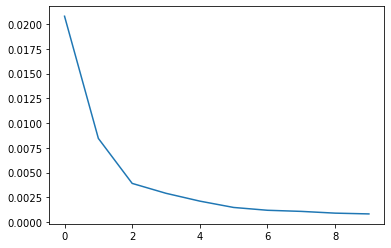

In [10]:
plt.plot(range(10), MSE)

**Predicting the prediction column of the whole data**

In [11]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

dtr = DecisionTreeRegressor()
dtr.fit(X, y)

prediction = dtr.predict(X)
data['prediction'] = prediction

In [12]:
# Model Results
data.head()

,Qual,Area,Price,prediction
0,7,1710,0.2085,0.196167
1,6,1262,0.1815,0.183250
2,7,1786,0.2235,0.223500
3,7,1717,0.1400,0.163750
4,8,2198,0.2500,0.250000


In [13]:
# Save the dataset
data.to_csv("Results.csv", index = False)